# WEEK 6

## Regression

In order to optimise the fitting parameters of a fitting function to the best fit for some data, we need a way to define how good our fit is. This goodness of fit is called chi-squared, which we’ll first apply to fitting a straight line - linear regression. Then we’ll look at how to optimise our fitting function using chi-squared in the general case using the gradient descent method. Finally, we’ll look at how to do this easily in Python in just a few lines of code, which will wrap up the course.

**Goals**:

1. Describe regression as a minimisation of errors problem
2. Distinguish appropriate from inappropriate models for particular data sets
3. Calculate multivariate calculus objects to perform a regression
4. Create code to fit a non-linear function to data using gradient descent

## Into to Linear Regression

### Sample Linear Regression

Model: $$y=y(x;a_i)=mx_i+c$$

$$a=\begin{bmatrix}m\\c\end{bmatrix}$$

$$r_i=y_i-mx_i-c$$

In order to find the optimal m and c, firstly we need to define a residual r.

$$\chi^2=\Sigma_ir_i^2=\Sigma_i(y_i-mx_i-c)^2$$

Then, I can take a measure of the overall quality of the fit being a quantity I'll call chi-squared, which is the sum of the squares of the residuals r. 

We are going to find the best chi-squared possible, the one that's lowest.

Now the minimum is going to be found when the gradient of chi-squared is zero.

$$\nabla x^2 = \begin{bmatrix}\frac{\partial{\chi^2}}{\partial{m}}\\\frac{\partial{\chi^2}}{\partial{c}}\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix} = \begin{bmatrix}-2\Sigma_ix_i(y_i-mx_i-c)\\-2\Sigma_i(y_i-mx_i-c)\end{bmatrix}$$ 

$$c=\bar{y}-m\bar{x}$$  c is the intercept which depending on the gradient m too

$\bar{x}$ and $\bar{y}$ are the average

$$\sigma_c\simeq\sigma{m}\sqrt{\bar{x}^2+\frac{1}{n}\Sigma_i(x-\bar{x})^2}$$

$$m=\frac{\Sigma(x-\bar{x})y}{\Sigma(x-\bar{x})^2}$$

$$\sigma^2_m\simeq\frac{\chi^2}{\Sigma(x-\bar{x})^2(n-2)}$$

### Quiz

writing code to calculate m and c

In [3]:
# Here the function is defined
def linfit(xdat,ydat):
  # Here xbar and ybar are calculated
  xbar = np.sum(xdat)/len(xdat)
  ybar = np.sum(ydat)/len(ydat)

  # Insert calculation of m and c below
  m = np.sum((xdat-xbar)*ydat)/np.sum((xdat-xbar)**2)
  c = ybar - m*xbar

  # Return your values as [m, c]
  return [m, c]

or use stats.linregression()
```
from scipy import stats

# Use the stats.linregress() method to evaluate regression
regression = stats.linregress(xdat, ydat)
```

## Non-linear Regression

### General non linear least squares

$$y(x;a_k)=(x-a_1)^2+a_2$$

we have data (y_i,x_i,\sigma_i)

$k=1...m$, $j=1...n$

$$\chi^2=\Sigma^n_{i=1}\frac{[y_i-y(x_i;a_k)]^2}{\sigma^2}$$

my minimal $\chi^2$ is going to be $\nabla{\chi^2=0}$

so i've got my vector A. im going to say that my next iteration $a_{next}$ is going to be my current iteration $a_{current}-constant*\nabla{\chi^2}$

$$\frac{d\chi^2}{da_k}=\Sigma^n_{i=1}-2\frac{[y_i-y(x_i;a_k)]}{\sigma^2}\frac{dy}{da_k}$$

$$a_{next}=a_{current}-constant\nabla{\chi^2}=a_{current}+\Sigma^n_{i=1}\frac{[y_i-y(x_i;a_k)]}{\sigma^2}\frac{dy}{da_k}$$

so: $\frac{dy}{da_1}=-2(x-a_1)$ and $\frac{dy}{da_2}=1$

### Doing least squares regression analysis in practice

For instance, we can observe that if we do a Taylor series expansion of chi squared, then the second term, the second derivative is the Hessian which gives us information about the curvature or the gradient of the gradient and the gradient of the Jacobian. 

And therefore, we can shoot directly for where the Jacobian is zero just as in Newton episode using that second derivative. Now using the Hessian would be faster than simply taking steps along a steep descent algorithm. 

Effectively, we'd be using the **Hessian** to give us a guess as to the sise of the step we should take in gradient descent. 

The problem is is that often the Hessian isn't very stable especially far from the minimum. So the **Levenberg–Marquardt method uses steepest descent far from the minimum**, and then switches to use the Hessian as it gets close to the minimum based on the criteria as to whether chi squared is getting better or not.

**If it is getting better, it uses the Hessian. And if it's in trouble, it uses steepest descent.** 

### QUIZ

<IPython.core.display.Javascript object>


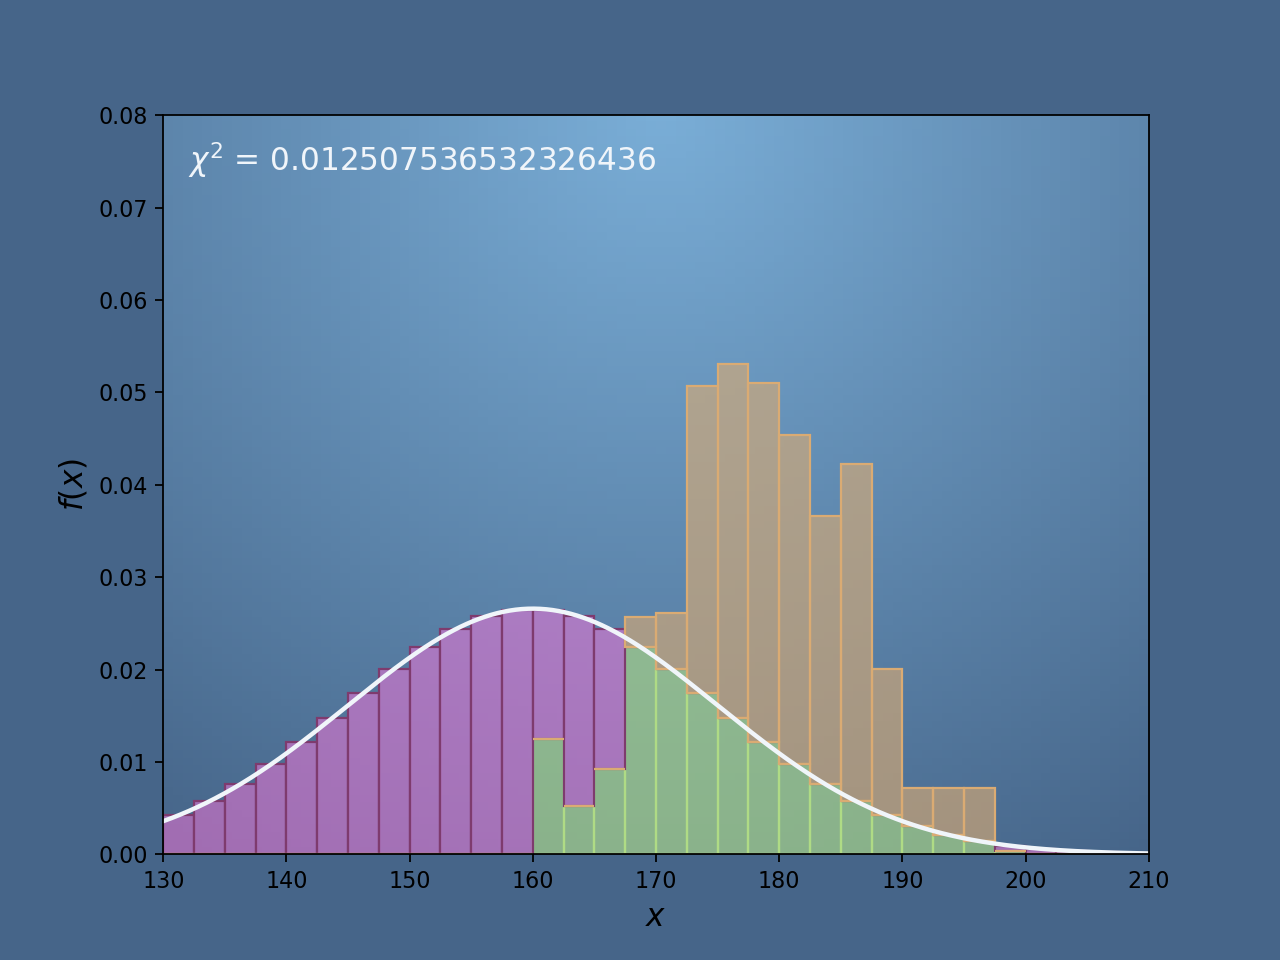

In [4]:
# Run this cell first to load the dependancies for this assessment,
# and generate the first figure.
from HeightsModule import *

In [5]:
# PACKAGE
import matplotlib.pyplot as plt
import numpy as np

In [24]:
# GRADED FUNCTION

# This is the Gaussian function.
def f (x,mu,sig) :
    return np.exp(-(x-mu)**2/(2*sig**2)) / np.sqrt(2*np.pi) / sig

# Next up, the derivative with respect to μ.
# If you wish, you may want to express this as f(x, mu, sig) multiplied by chain rule terms.
# === COMPLETE THIS FUNCTION ===
def dfdmu (x,mu,sig) :
    return f(x, mu, sig) * (x-mu) / (sig**2)

# Finally in this cell, the derivative with respect to σ.
# === COMPLETE THIS FUNCTION ===
def dfdsig (x,mu,sig) :
    return f(x, mu, sig) * ((x-mu)**2 / sig**3 - 1/sig)

In [25]:
# GRADED FUNCTION

# Complete the expression for the Jacobian, the first term is done for you.
# Implement the second.
# === COMPLETE THIS FUNCTION ===
def steepest_step (x, y, mu, sig, aggression) :
    J = np.array([
        -2*(y - f(x,mu,sig)) @ dfdmu(x,mu,sig),
        -2*(y - f(x,mu,sig)) @ dfdsig(x,mu,sig)
        # Replace the ??? with the second element of the Jacobian.
    ])
    step = -J * aggression
    return step

<IPython.core.display.Javascript object>


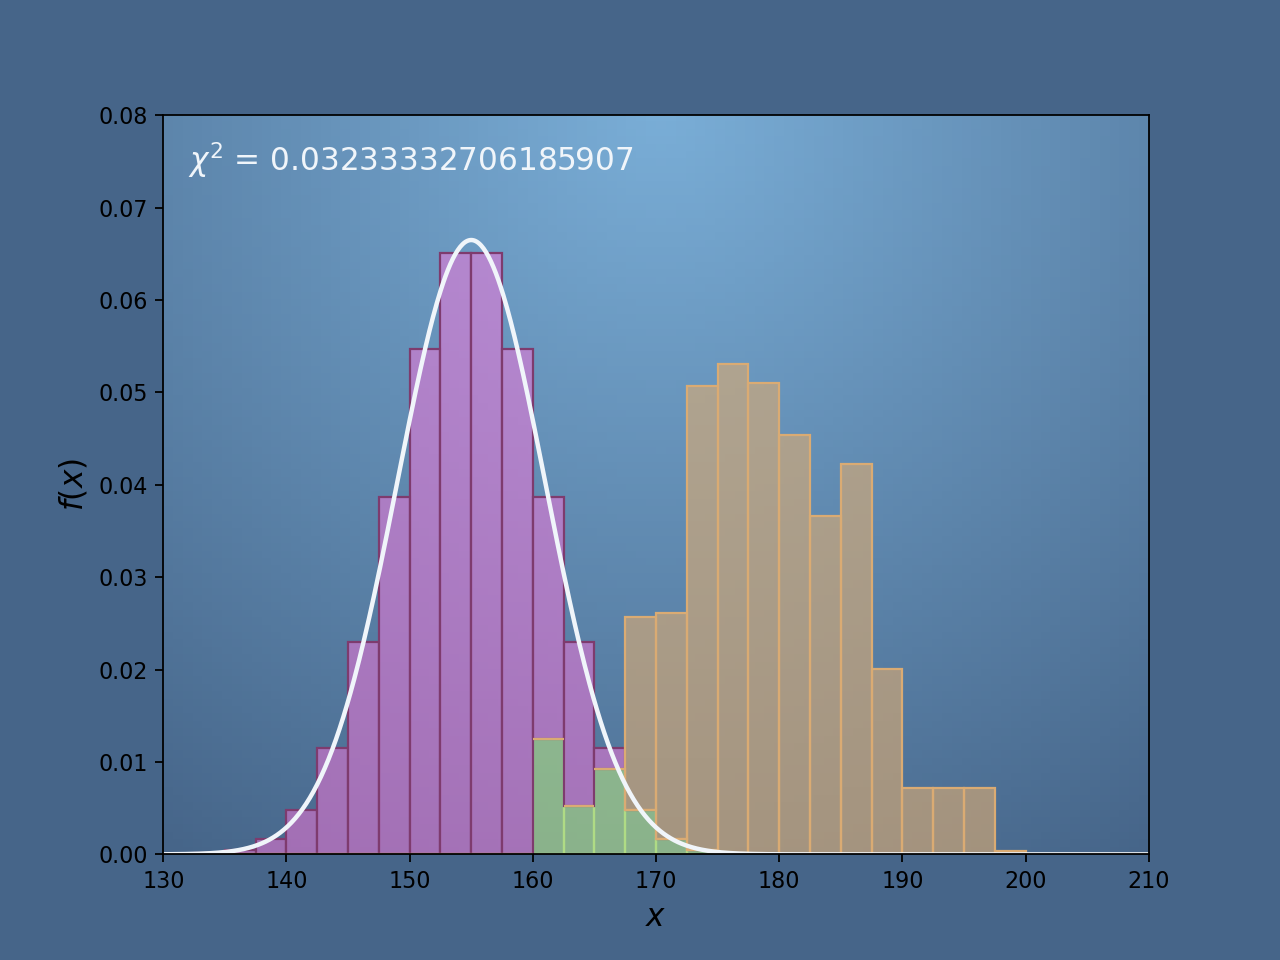

<IPython.core.display.Javascript object>


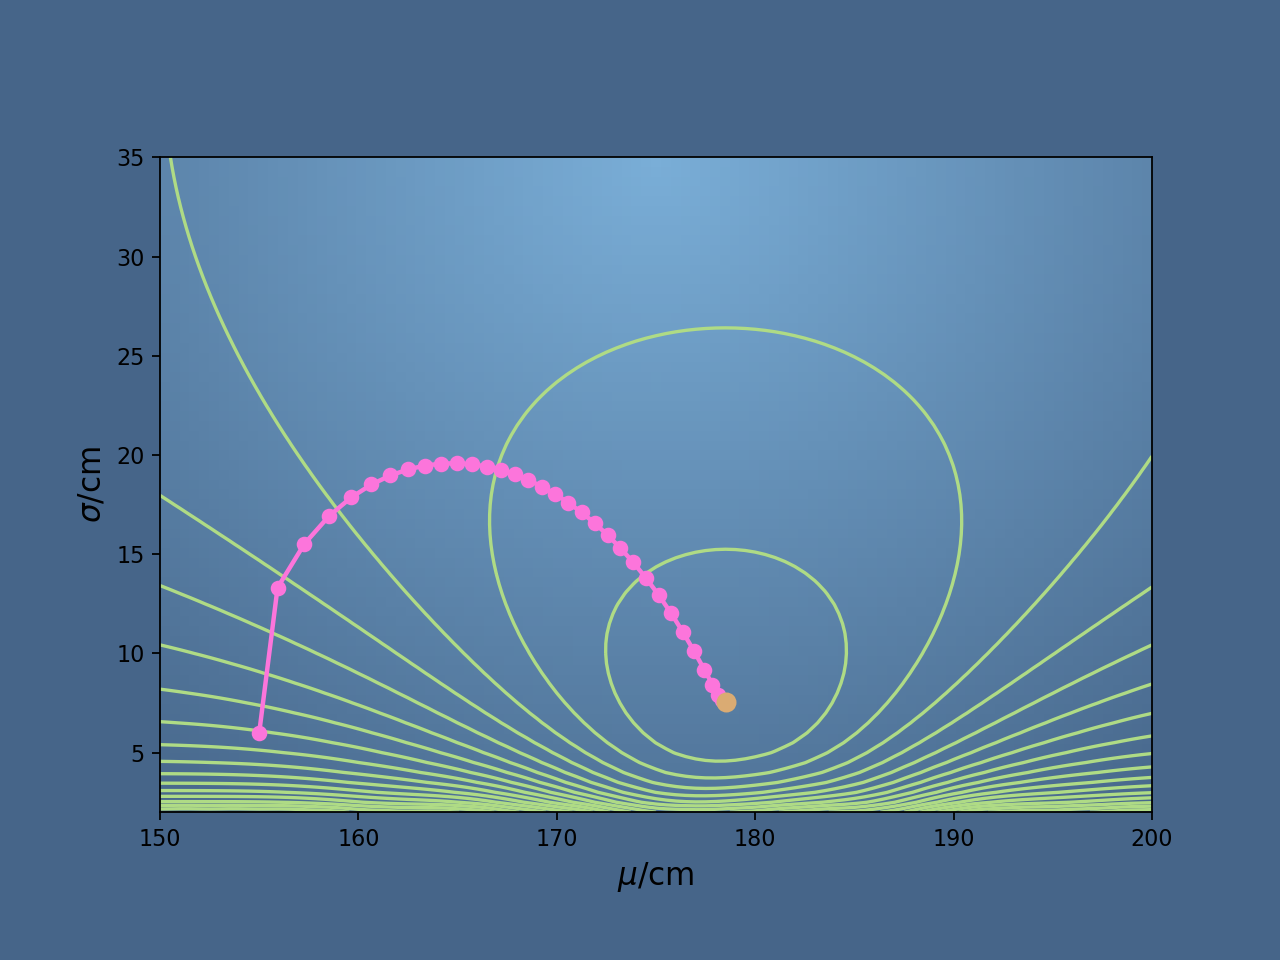

<IPython.core.display.Javascript object>


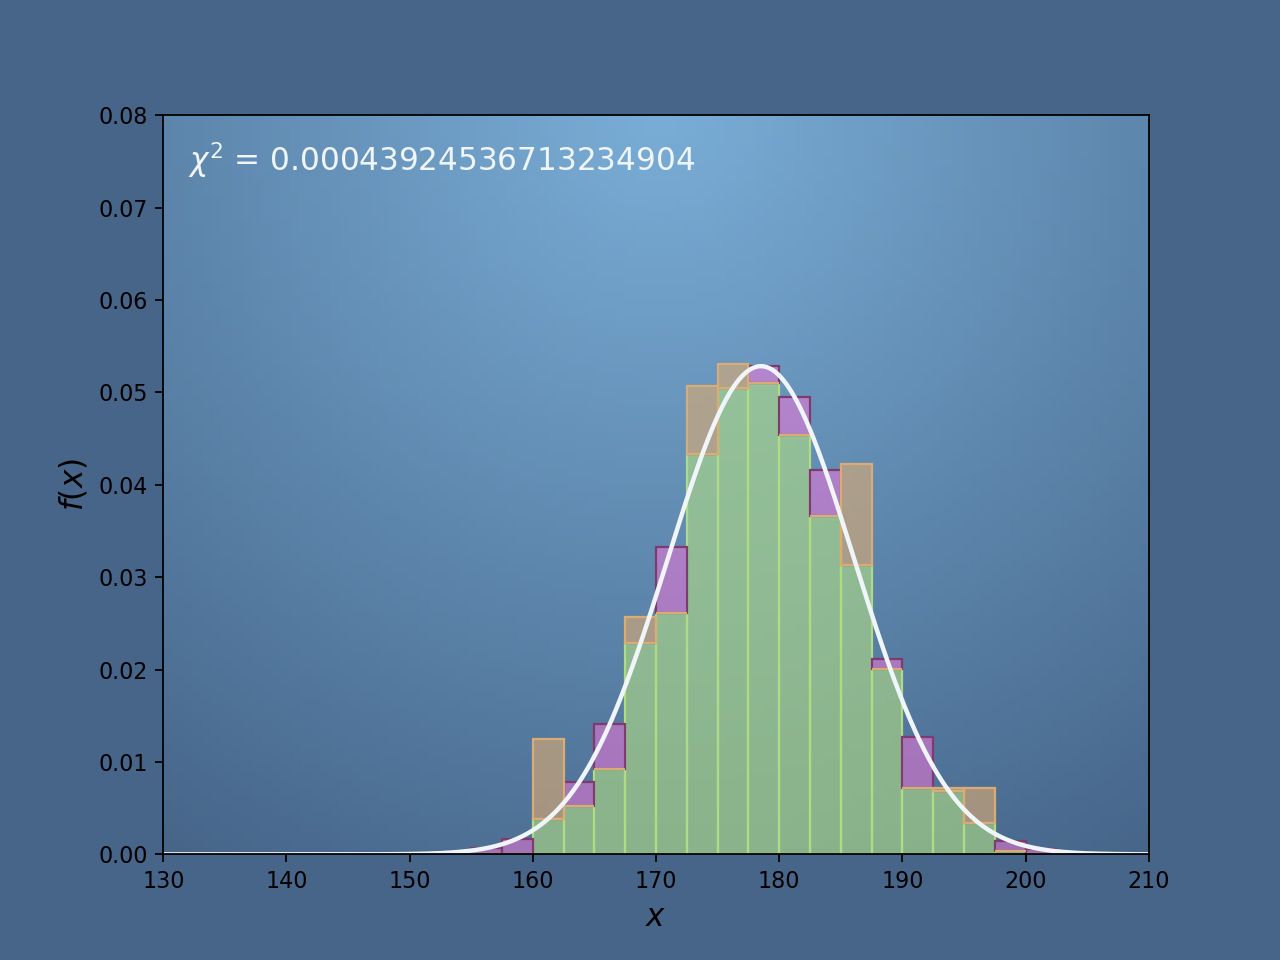

In [26]:
# First get the heights data, ranges and frequencies
x,y = heights_data()

# Next we'll assign trial values for these.
mu = 155 ; sig = 6
# We'll keep a track of these so we can plot their evolution.
p = np.array([[mu, sig]])

# Plot the histogram for our parameter guess
histogram(f, [mu, sig])
# Do a few rounds of steepest descent.
for i in range(50) :
    dmu, dsig = steepest_step(x, y, mu, sig, 2000)
    mu += dmu
    sig += dsig
    p = np.append(p, [[mu,sig]], axis=0)
# Plot the path through parameter space.
contour(f, p)
# Plot the final histogram.
histogram(f, [mu, sig])